In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy import special
import scipy
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings(action='ignore')

In [148]:
train, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')

In [149]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [150]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [151]:
test_idx = test.Id
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

## EDA

#### 1. Univariate search

In [152]:
# 수치형 변수와 문자형 변수 확인
num_vars = train._get_numeric_data().columns
obj_vars = set(train.columns) - set(num_vars)

In [153]:
# 명목형 변수
nominal_vars = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 
    'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 
    'MoSold', 'YrSold', 'SaleType', 'SaleCondition'
]

In [154]:
# 순위형 변수
ranking_vars = [
    'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
]

In [155]:
# 연속형 변수
continue_vars = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
    'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr',
    'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'
]

In [156]:
X_total = pd.concat((train, test)).drop(['SalePrice'], axis=1)

In [157]:
X_total[continue_vars].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,GarageYrBlt,YearBuilt,YearRemodAdd
count,2433.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2919.000000,2919.000000
mean,69.305795,10168.114080,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,1978.113406,1971.312778,1984.264474
std,23.344905,7886.996359,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,25.574285,30.291442,20.894344
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,1872.000000,1950.000000
25%,59.000000,7478.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,1953.500000,1965.000000
50%,68.000000,9453.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1979.000000,1973.000000,1993.000000
75%,80.000000,11570.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2002.000000,2001.000000,2004.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,2207.000000,2010.000000,2010.000000


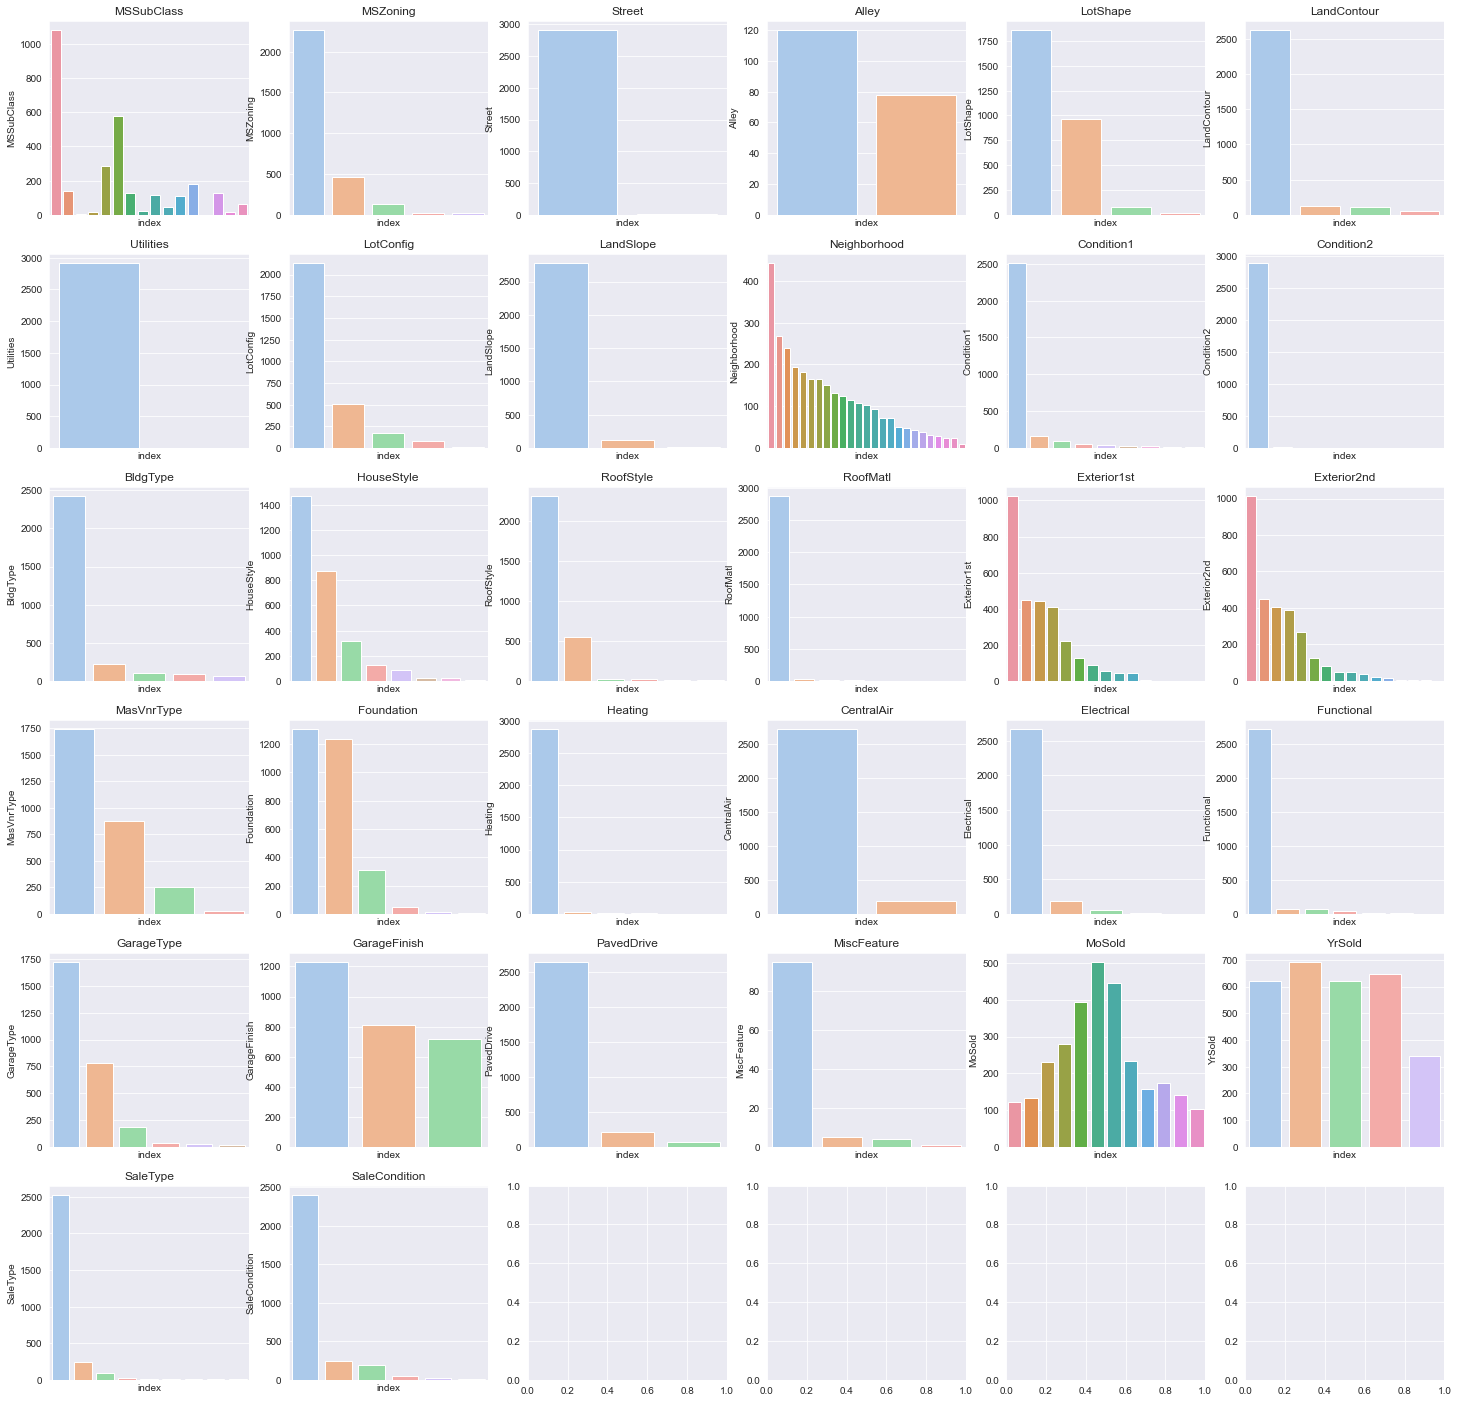

In [175]:
f, ax = plt.subplots(6, 6, figsize=(25, 25))
for i, c in enumerate(nominal_vars):
    g = sns.barplot(data=pd.DataFrame(X_total[c].value_counts()).reset_index(), x='index', y=c, ax=ax[i//6, i%6])
    g.set(xticks=[])
    g.set(title=c)

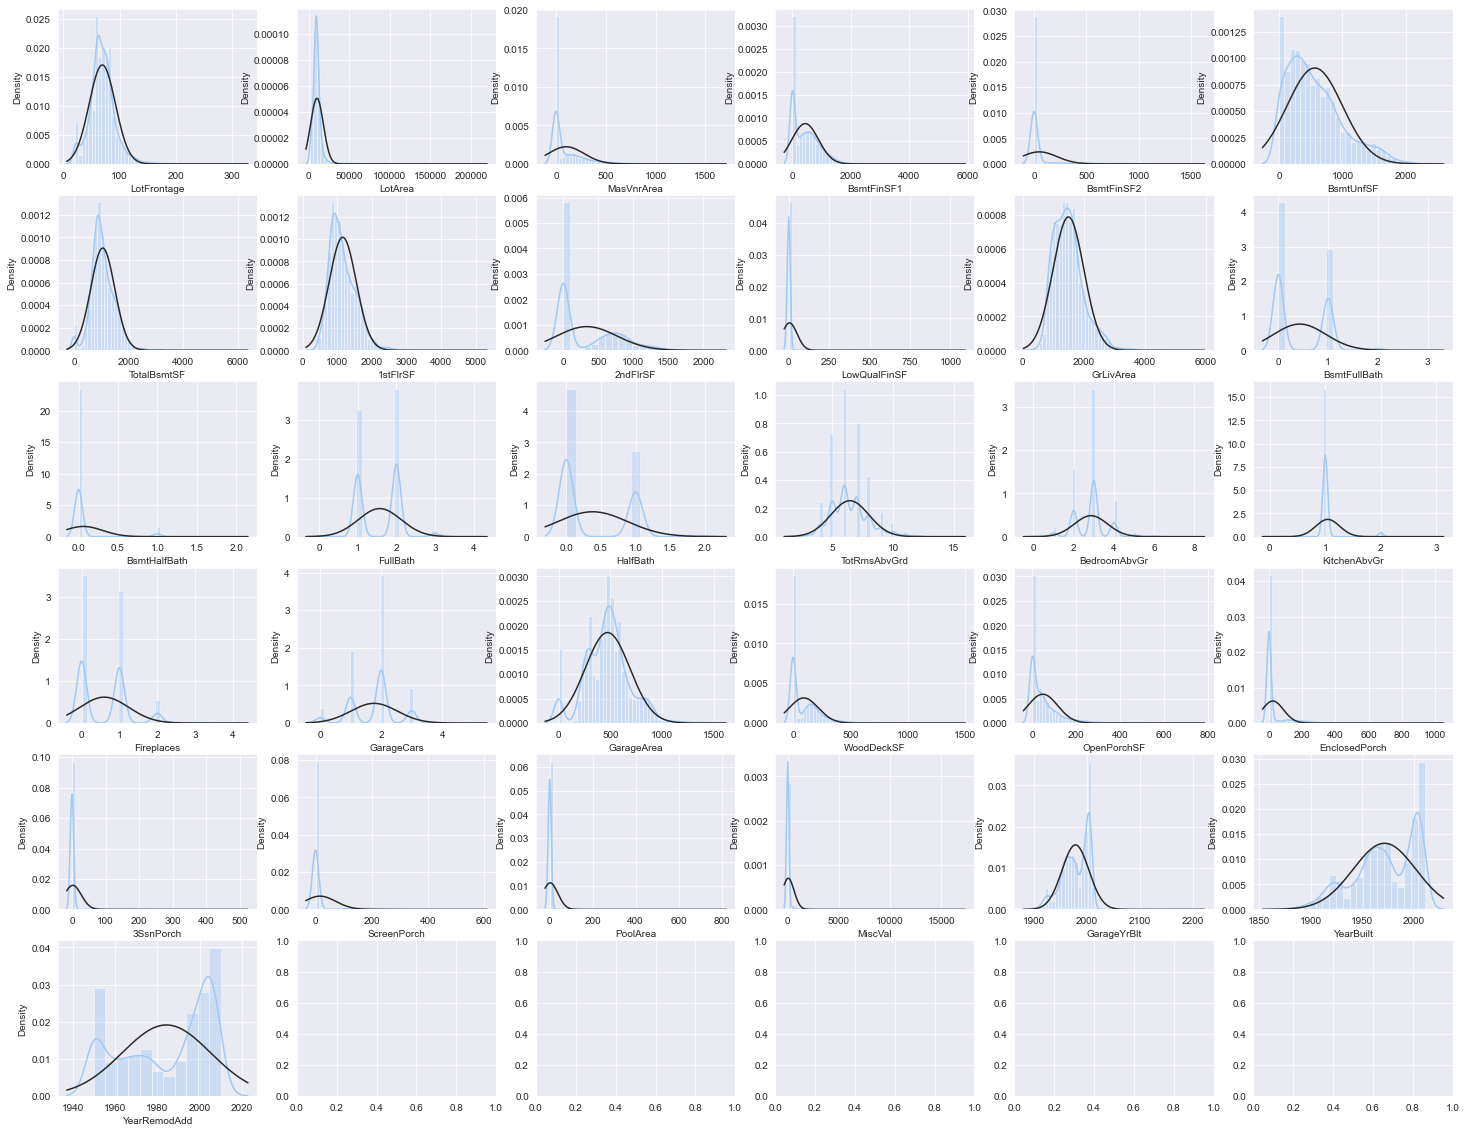

In [160]:
f, ax = plt.subplots(6, 6, figsize=(25, 20))
for i, c in enumerate(continue_vars):
    sns.distplot(X_total[c], fit=stats.norm, ax=ax[i//6, i%6])

#### 2. Bivariate search

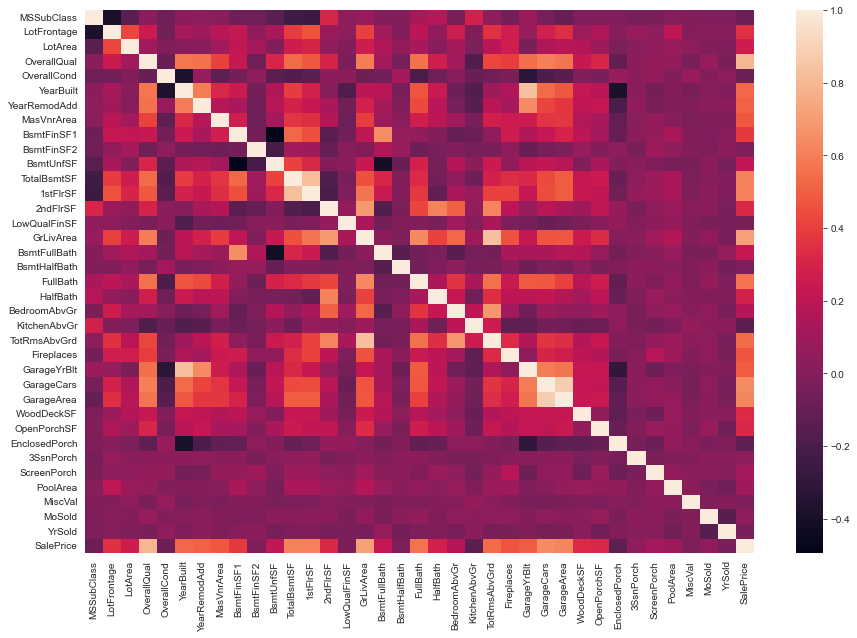

In [180]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr)
plt.show()

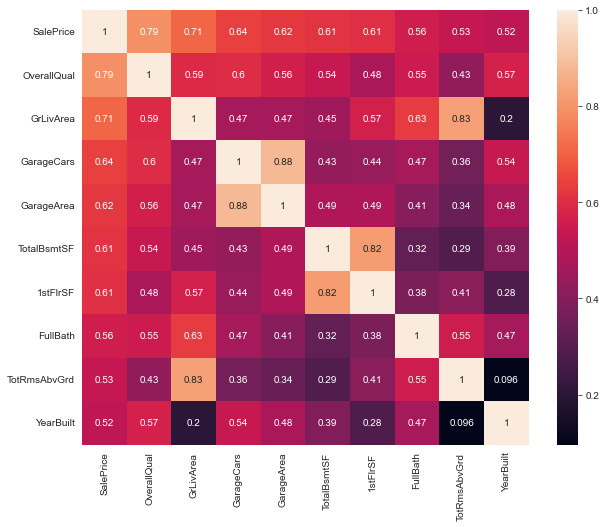

In [189]:
f, ax = plt.subplots(figsize=(10, 8))
corr = train[corr.SalePrice.sort_values(ascending=False)[:10].index].corr()
sns.heatmap(corr, annot=True)
plt.show()

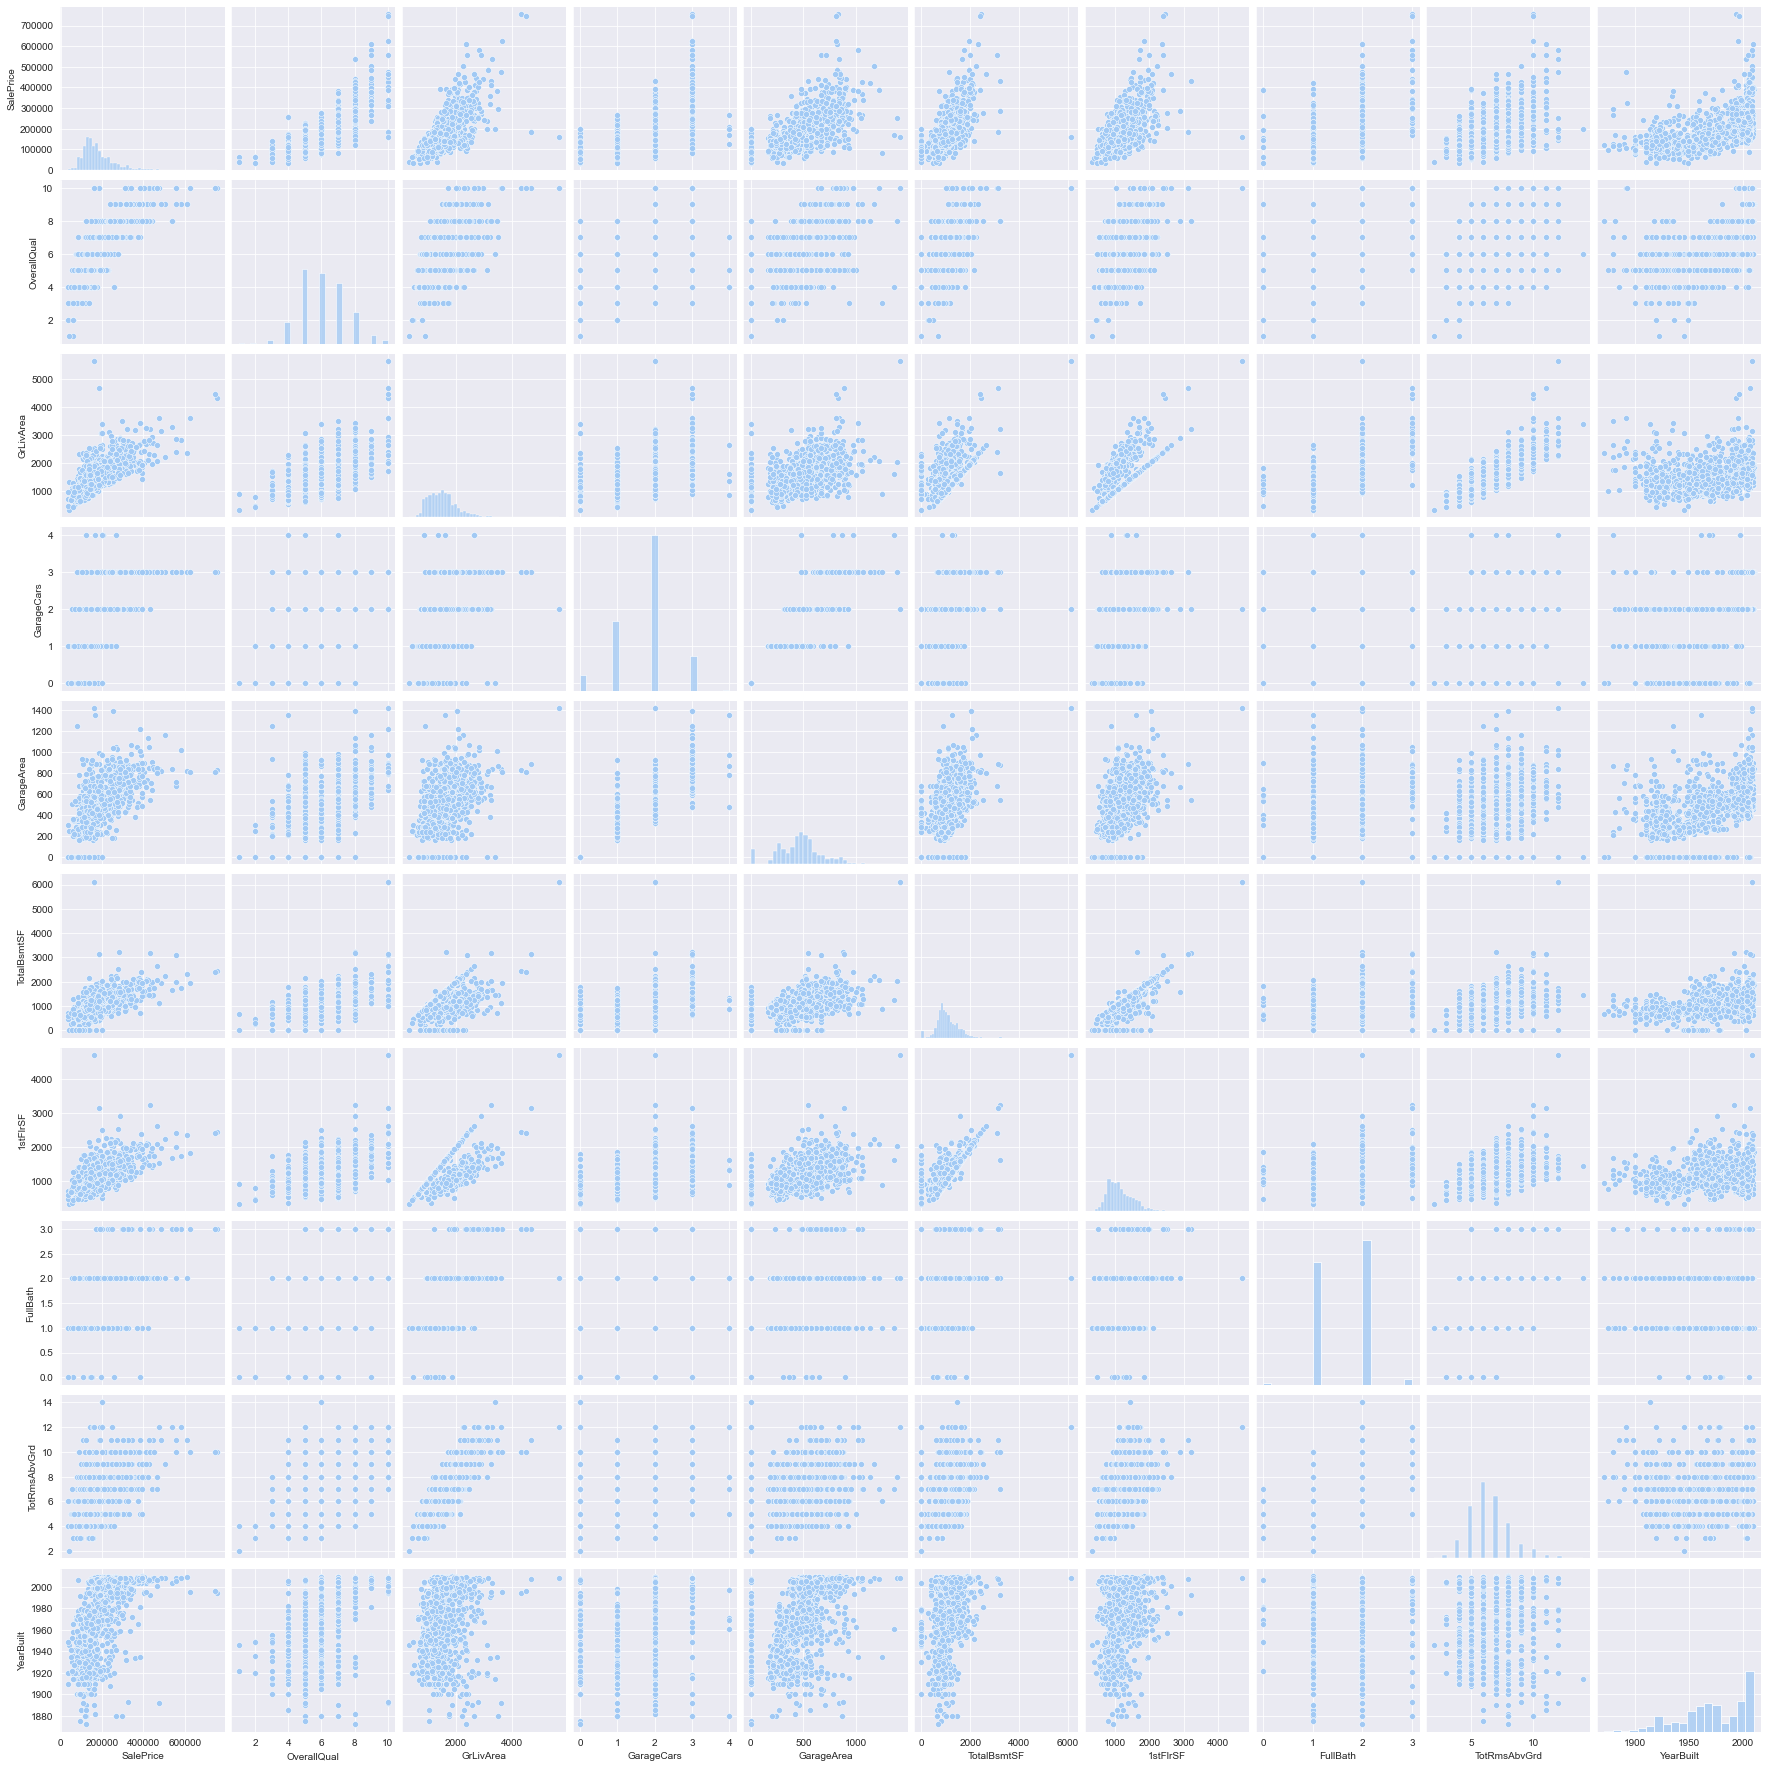

In [190]:
sns.pairplot(train[corr.SalePrice.sort_values(ascending=False)[:10].index])
plt.show()

In [193]:
continue_cols2 = [
    'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'Fireplaces', 'GarageYrBlt',
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', '1stFlrSF', 
    '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'TotRmsAbvGrd',
    'FullBath', 'HalfBath', 'OverallQual'
]

In [196]:
set(continue_cols2) - set(continue_vars)

{'OverallQual'}

In [197]:
ranking_vars2 = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [198]:
set(ranking_vars) - set(ranking_vars2)

{'OverallQual'}

In [199]:
set(ranking_vars2) - set(ranking_vars)

{'Alley',
 'CentralAir',
 'Functional',
 'GarageFinish',
 'LandSlope',
 'LotShape',
 'MSSubClass',
 'MoSold',
 'PavedDrive',
 'Street',
 'YrSold'}